# Laptop Price Prediction for SmartTech Co.

## Project Overview:
#### SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

## Client's Objectives:

### Accurate Pricing: 
    Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

### Market Positioning: 
    Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

### Brand Influence: 
    Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Suppress all import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the dataset

df = pd.read_csv("laptop.csv")

## Data Understanding and EDA

In [3]:
# Retrieving the first 5 values

df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Last 5 records

df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
# Checking number of rows and columns

df.shape

(1303, 13)

In [6]:
# retrieving and understanding the initial information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
# Checking total number of duplicate rows present in the dataset

df.duplicated().sum()

0

In [8]:
# Checking the percentage of null values 

df.isnull().sum()/len(df)*100

Unnamed: 0.1        0.000000
Unnamed: 0          2.302379
Company             2.302379
TypeName            2.302379
Inches              2.302379
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              2.302379
Price               2.302379
dtype: float64

In [9]:
# Names of each column

df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [10]:
# Dropping unnecessary columns from the dataset

df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [11]:
# Retrieving the first 5 record

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
# dropping the missing values

df = df.dropna()

In [13]:
# Checking the number of columns and rows present now

df.shape

(1273, 11)

In [14]:
# Checking for null records

df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**DEFINITION OF COLUMNS**  

**Company** - Name of the company/brand  
**TypeName** - Type of Device/ Category  
**Inches** - Size of the screen  
**ScreenResolution** - The number of pixels a screen can display horizontally and vertically, and is represented    as two numbers  
**CPU** - Processor  
**RAM** - Primary memory  
**Memory** - Secondary storage/ Flash memory  
**GPU** - Graphics  
**OpSys** - Operating System  
**Weight** - Weight of the laptop in kg

In [15]:
# Replacing strings to blank spaces

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
# Checking unique values of 'Weight' variable

df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23', '?',
       '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3', '1.68',
       '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14', '1.36',
       '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28', '2.33',
       '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6', '2.26',
       '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15', '1.27',


In [18]:
# Checking unique values of 'RAM' variable

df['Ram'].unique()

array(['8', '16', '4', '2', '12', '64', '6', '32', '24', '1'],
      dtype=object)

In [19]:
# Checking Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [20]:
# Identifying record in weight containing '?'

df.loc[df['Weight'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [21]:
# Count of unique values of 'Company' variable

df['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [22]:
# Replacing '?' with value after a market research

df['Weight'] = df['Weight'].replace('?',1.33)

In [23]:
# Checking info again

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


In [24]:
# Checking for unique values for the variable

df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '2.5', '1.62', '1.91', '2.3', '1.35', '1.88',
       '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65', '2.77',
       '3.2', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4', '1.8', '1.9',
       '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21', '2.45',
       '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23', '2.16',
       '2.36', '7.2', '2.05', '1.32', '1.75', '0.97', '2.56', '1.48',
       '1.74', '1.1', '1.56', '2.03', '1.05', '5.4', '4.4', '1.90',
       '1.29', '2.0', '1.95', '2.06', '1.12', '3.49', '3.35', '2.23',
       1.33, '2.9', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08', '4.3',
       '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '4.1', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '5.8', '1.28',
       '2.33', '1.45', '2.79', '8.23', '1.26', '1.84', '0.0002', '2.6',
       '2.26', '3.25', '1.59', '1.13', '1.42', '1.78', '1.10', '1.15',
       

In [25]:
# Changing the datatype of 'Weight' variable to 'float'

df['Weight'] = df['Weight'].astype(float)

In [26]:
# Checking the change with '.info' function

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.3+ KB


In [27]:
# Changing the datatype of 'RAM' variable to 'int'

df['Ram'] = df['Ram'].astype(int)

In [28]:
# Checking the change

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 114.4+ KB


In [29]:
# Finding the unique values of 'Inches' variable

df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [30]:
# Getting the record containing '?'

df.loc[df['Inches'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24


In [31]:
# Replacing the '?' with 15.6 after a thorough research

df['Inches'] = df['Inches'].replace('?',15.6)

In [32]:
# Changing the datatype

df['Inches'] = df['Inches'].astype(float)

In [33]:
# Checking the happened change

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.4+ KB


<Axes: xlabel='Price', ylabel='Density'>

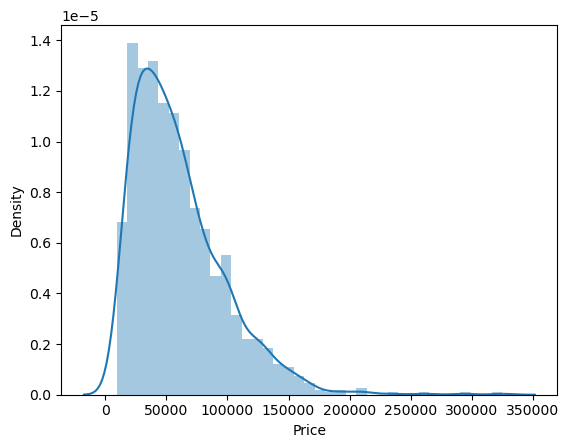

In [34]:
# Checking the distribution of 'Price' column

sns.distplot(df['Price'])

**The price column is right skewed**

<Axes: xlabel='Company'>

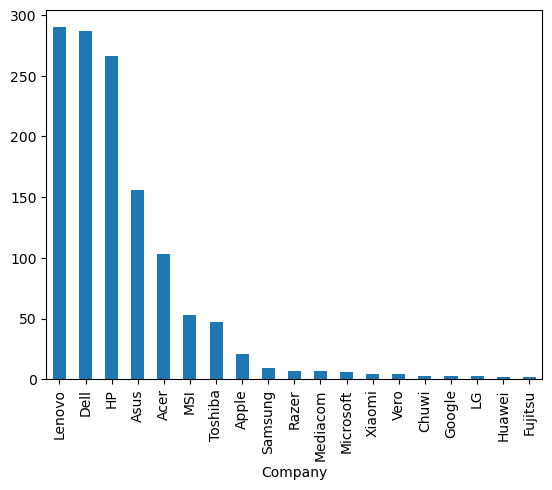

In [35]:
# che4cking the count of laptops of different brands with a barplot

df['Company'].value_counts().plot(kind='bar')

**Lenovo> Dell> HP> Asus are sold maximum**  
**Google, LG, Huawei, Fujitsu are sold less**

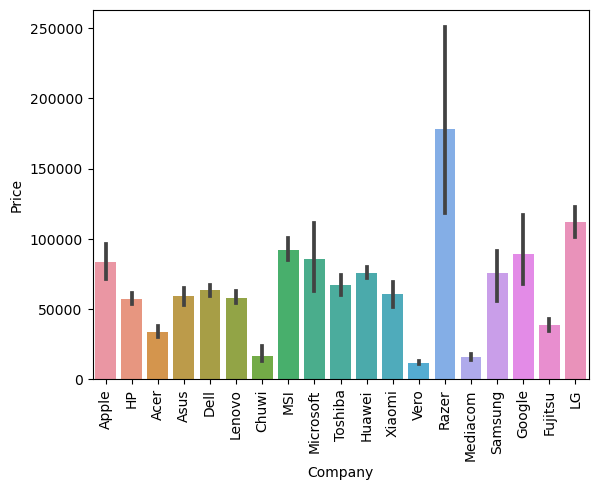

In [36]:
# Company vs Price graph

sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

**Razer being the gaming laptop is on the higher side wrt Price**  
**But in general Apple leads followed by Dell, Lenovo,Asus Hp being the budget laptops**

In [37]:
# Count of unique 'Typename'

df['TypeName'].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

<Axes: xlabel='TypeName'>

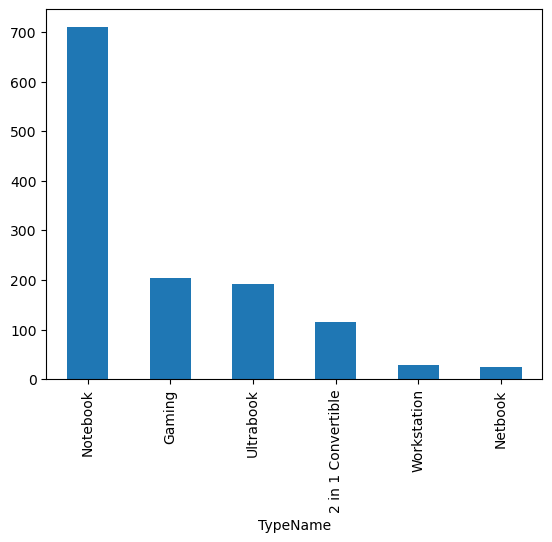

In [38]:
# Graphical representation of the counts

df['TypeName'].value_counts().plot(kind='bar')

**Notebook being the popular category followed by Gamimg and Ultrabook**

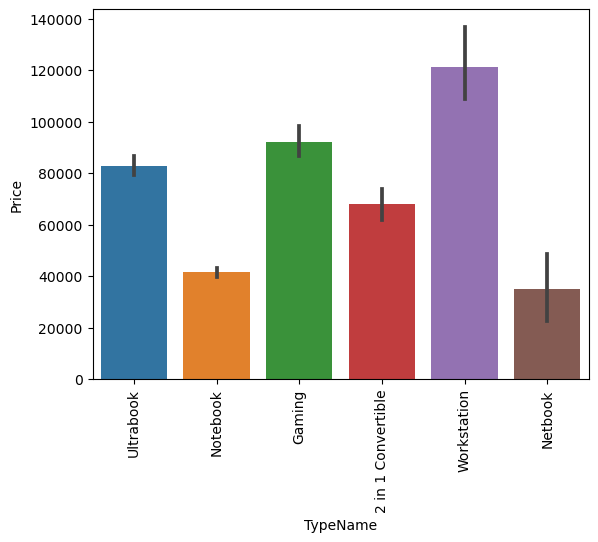

In [39]:
# Price vs Typename bar graph

sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

**Its obvious Notebooks are budget friendly(Price around 40000)**  
**Gaming(Price around 100K) is next followed by Ultrabook(Price around 80K)**

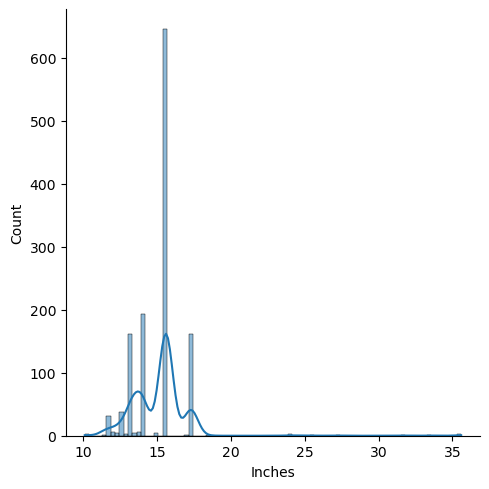

In [40]:
# Distribution of 'Inches' column with the help of ditsplot

sns.displot(df['Inches'],kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

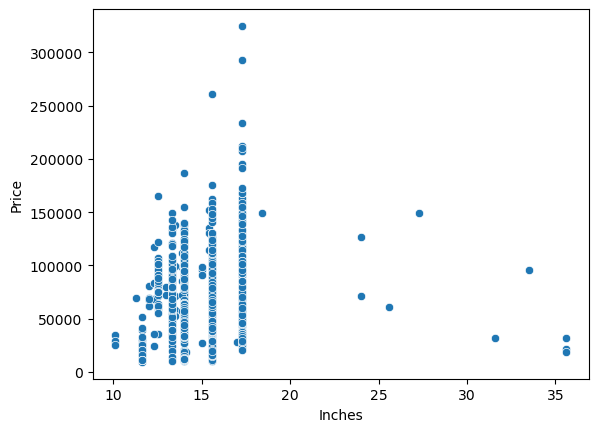

In [41]:
# Scatterplot to show Inches vs Price

sns.scatterplot(x=df['Inches'],y=df['Price'])

**15.6 inches screen laptops are most popular**

## Feature Engineering

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [43]:
# Count of unique category of the variable

df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [44]:
# New column where '0' for non touch and '1' for touch screen

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [45]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
719,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936.00,0
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15238.08,0
306,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,105228.00,1
177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.40,149130.72,0
1089,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,20619.36,0


In [46]:
# count of touch and non touch

df['Touchscreen'].value_counts()

Touchscreen
0    1088
1     185
Name: count, dtype: int64

<Axes: xlabel='Touchscreen'>

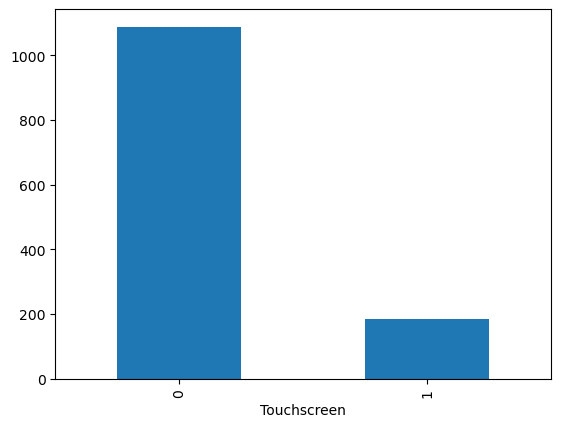

In [47]:
# Graphical rep of count

df['Touchscreen'].value_counts().plot(kind='bar')

**Non Touch screen laptops are most popular among customers**

<Axes: xlabel='Touchscreen', ylabel='Price'>

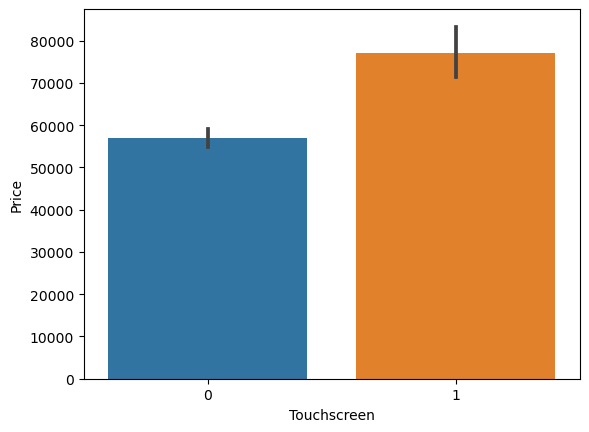

In [48]:
# brplot touchscreen vs price

sns.barplot(x=df['Touchscreen'],y=df['Price'])

**Average price of Touch screen laptops are more than the non touch screen types**

In [49]:
# new column for ips screen present or not

df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [50]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0
54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0,0
255,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.7200,0,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0
323,HP,Notebook,15.6,IPS Panel Full HD 1366x768,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.10,48058.5600,0,1


<Axes: xlabel='Ips'>

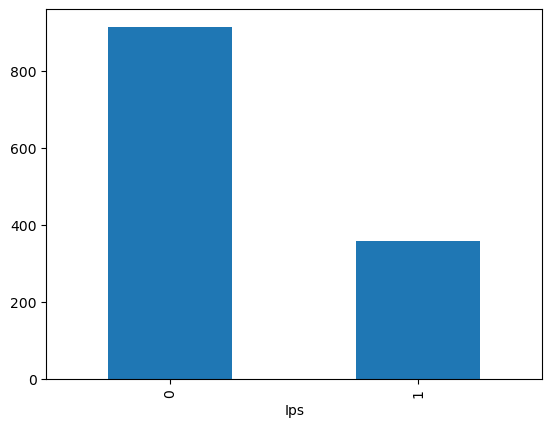

In [51]:
# unique value counts in bar graph

df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

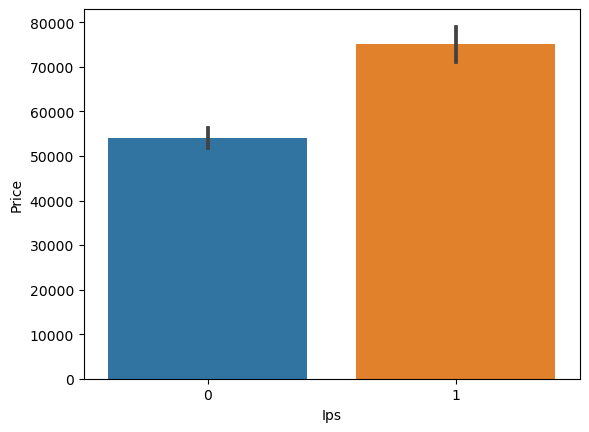

In [52]:
# Ips vs price graph

sns.barplot(x=df['Ips'],y=df['Price'])

In [53]:
# String manipulation

df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1273, dtype: object

In [54]:
temp= df["ScreenResolution"].str.split("x",n=1,expand=True)

In [55]:
# Creaing two columns 'X resolution' and 'Y resolution'

df["X_res"]=temp[0]
df["Y_res"]=temp[1]

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [57]:
# string manipulation on 'X resolution' using pattern matching

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [58]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [59]:
# changing the types of the columns

df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int32  
 14  Y_res             1273 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 144.2+ KB


In [61]:
# Checking the correlation between 'Price' and all the numeric columns

df.corr(numeric_only=True)['Price']

Inches         0.044966
Ram            0.685648
Weight         0.175517
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
Name: Price, dtype: float64

**RAM is positively correlated with Price**  
**Touchscreen negatively correlated with price**  
**Resilution also positively correlated with price**

In [62]:
# creating a column 'Pixel per inch' with the folmula and also changing the datatype to float

df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [63]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [64]:
# Checking correlation again

df.corr(numeric_only=True)['Price']

Inches         0.044966
Ram            0.685648
Weight         0.175517
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
ppi            0.468636
Name: Price, dtype: float64

**ppi column is slighlty correlated with price column**

In [65]:
# dropping the column' screen resolution'

df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [66]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [67]:
# checking the counts oif unique values in CPU

df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [68]:
# Creating a new column and retrieving the first 3 words from 'cpu' and store in new column

df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [69]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [70]:
# Function to identify different cpu from a given text

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [71]:
# applying the function 'fetch_processor' to the new column created

df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [72]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

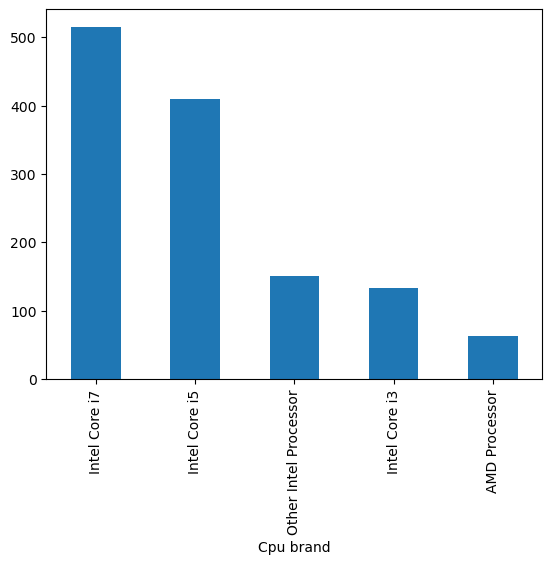

In [73]:
# appling value counts on 'cpu brand'

df['Cpu brand'].value_counts().plot(kind='bar')

**Intel i7 leads followed by i5 then other processors and demand for i3 and AMD are comparatively less**

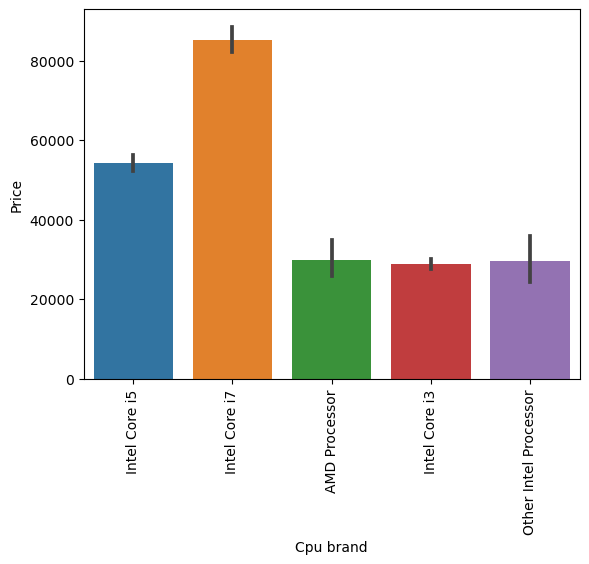

In [74]:
# bar graph to show the price range of different processors

sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**i7 is costlier followed by i5 and then comes other processor followed by i3**

In [75]:
# dropping 2 columns for further analysis

df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [76]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

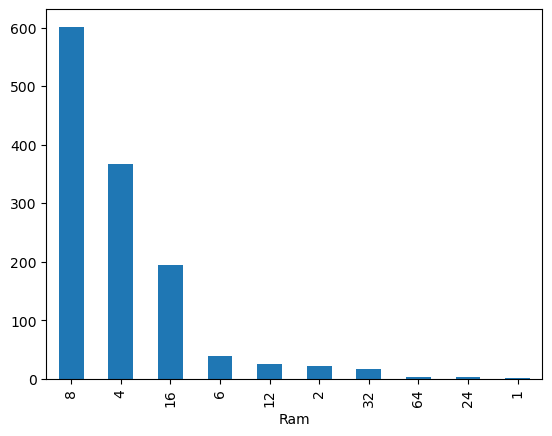

In [77]:
df['Ram'].value_counts().plot(kind='bar')

**8gb RAM are most popular then 4Gb but unfortunately 16gb are less popular because of the high price**

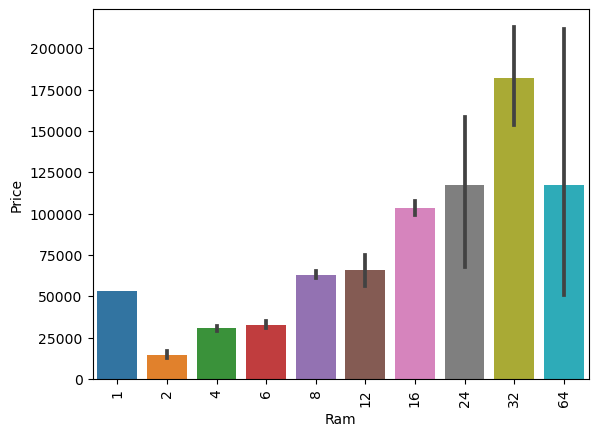

In [78]:
# RAM vs Price

sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Laptops with high RAM are priced higher**

In [79]:
# Unique value counts of 'memory' column

df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [80]:
# finding record with '?'

df.loc[df['Memory'] == '?']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
770,Dell,Notebook,16,?,AMD Radeon R7 M445,Windows 10,2.3,62938.0656,0,0,141.211998,Intel Core i7


In [81]:
# Replacing '?' with value after thorough research

df['Memory'] = df['Memory'].replace('?','2TB HDD')

In [82]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           17
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [83]:
# String manipulation

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [84]:
# assigns first part to 'first' and second part to 'second'

df["first"]= new[0]
df["first"] = new[0].str.strip()

df["second"]= new[1]

In [85]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


In [86]:
# Creates columns indicating the presence of each storage type in 'first'.

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [87]:
# Keeps only numeric characters.

df['first'] = df['first'].str.replace(r'\D', '')


# Replaces NaNs in 'second' with "0"

df["second"].fillna("0", inplace = True)

In [88]:
# Creates columns indicating the presence of each storage type in 'second'.

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [89]:
# Keeps only numeric characters in 'second'

df['second'] = df['second'].str.replace(r'\D', '')

In [90]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
164,Acer,Notebook,4,1000 HDD,Intel HD Graphics 500,Windows 10,2.1,18541.44,0,0,...,1000 HDD,0,1,0,0,0,0,0,0,0
440,Lenovo,Notebook,8,1000 HDD,AMD Radeon R4,Windows 10,2.8,27652.32,0,0,...,1000 HDD,0,1,0,0,0,0,0,0,0
204,Dell,Workstation,16,256 SSD + 1000 HDD,Nvidia Quadro M1200,Windows 10,2.8,162770.40,0,0,...,256 SSD,1000 HDD,0,1,0,0,1,0,0,0


In [91]:

# data = {'Memory': ['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
#        '256 Flash Storage', '1000 HDD', '64 Flash Storage',
#        '32 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
#        '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
#        '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid']}
# df = pd.DataFrame(data)

# Function to extract the numeric part
def extract_number(memory_str):
    return int(''.join(filter(str.isdigit, memory_str)))

# Applying the function to the 'first' column
df['first'] = df['first'].apply(extract_number)




In [92]:
# Function to extract the numeric part
def extract_number(memory_str):
    return int(''.join(filter(str.isdigit, memory_str)))

# Applying the function to the 'second' column
df['second'] = df['second'].apply(extract_number)

In [93]:
# checking the info but mainly the datatype of the columns created

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Ram                  1273 non-null   int32  
 3   Memory               1273 non-null   object 
 4   Gpu                  1273 non-null   object 
 5   OpSys                1273 non-null   object 
 6   Weight               1273 non-null   float64
 7   Price                1273 non-null   float64
 8   Touchscreen          1273 non-null   int64  
 9   Ips                  1273 non-null   int64  
 10  ppi                  1273 non-null   float64
 11  Cpu brand            1273 non-null   object 
 12  first                1273 non-null   int64  
 13  second               1273 non-null   int64  
 14  Layer1HDD            1273 non-null   int64  
 15  Layer1SSD            1273 non-null   int64 

In [94]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1273 non-null   object 
 1   TypeName             1273 non-null   object 
 2   Ram                  1273 non-null   int32  
 3   Memory               1273 non-null   object 
 4   Gpu                  1273 non-null   object 
 5   OpSys                1273 non-null   object 
 6   Weight               1273 non-null   float64
 7   Price                1273 non-null   float64
 8   Touchscreen          1273 non-null   int64  
 9   Ips                  1273 non-null   int64  
 10  ppi                  1273 non-null   float64
 11  Cpu brand            1273 non-null   object 
 12  first                1273 non-null   int64  
 13  second               1273 non-null   int64  
 14  Layer1HDD            1273 non-null   int64  
 15  Layer1SSD            1273 non-null   int64 

In [96]:
# Computes the total capacity for each storage type

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [97]:
# Removes the intermediate columns used for calculations.

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [98]:
# checking the samples

df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1067,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1,0,165.632118,Intel Core i7,0,256,0,0
520,Lenovo,Gaming,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,74538.7200,0,1,141.211998,Intel Core i7,1000,256,0,0
103,HP,Ultrabook,8,256 SSD,Nvidia GeForce MX150,Windows 10,1.38,59620.3200,0,1,165.632118,Intel Core i7,0,256,0,0
1188,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 520,Linux,1.23,58554.7200,1,0,276.053530,Intel Core i5,0,256,0,0
490,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.30,53918.8272,0,1,141.211998,Intel Core i5,0,256,0,0


In [99]:
# dropping the column 'memory'

df.drop(columns=['Memory'],inplace=True)

In [100]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [101]:
# Correlation of numeric columns with Price

df.corr(numeric_only=True)['Price']

Ram              0.685648
Weight           0.175517
Price            1.000000
Touchscreen      0.188994
Ips              0.254851
ppi              0.468636
HDD             -0.094825
SSD              0.668416
Hybrid           0.007843
Flash_Storage   -0.038332
Name: Price, dtype: float64

**Flash memory is negatively correlated with price**  
**Hybrid is less correlated to price column**

In [102]:
# dropping columns

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [103]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [104]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [105]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [106]:
# string manipulation

df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [107]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [108]:
df['Gpu brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [109]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [110]:
df = df[df['Gpu brand'] != 'ARM']

In [111]:
# count of the unique values present in 'GPU'

df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

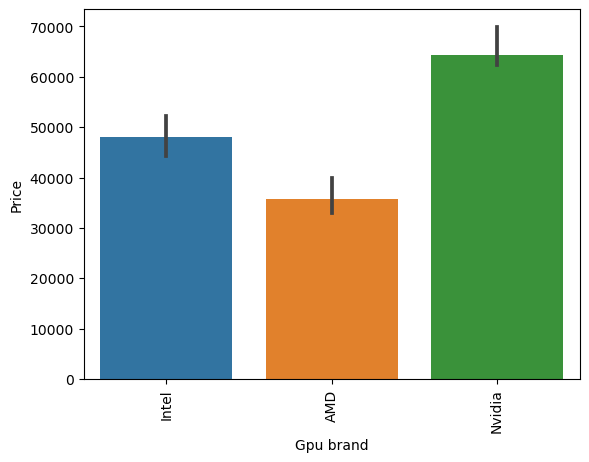

In [112]:
# Barplot gpu vs price

sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

**Nvidia gpu are costlier than intel**  
**But intel gpu are popular**

In [113]:
# dropping the gpu column

df.drop(columns=['Gpu'],inplace=True)

In [114]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [115]:
# checking for all the unique OS and their counts

df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

**Win 10 Os are most popular**

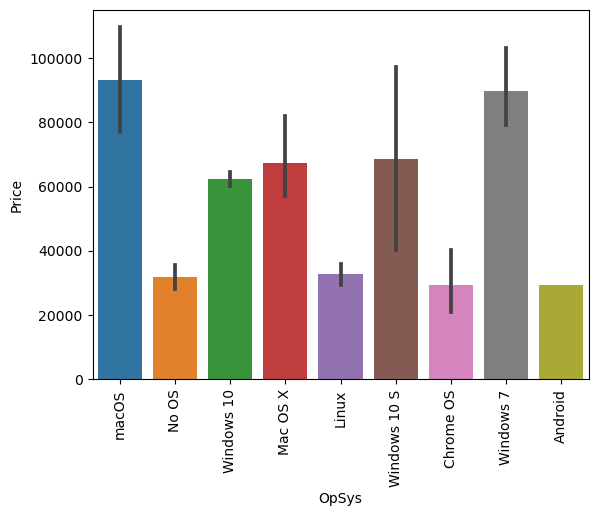

In [116]:
# OS vs Price

sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Price wise MAC Os are more costly than windows Os**

In [117]:
# function for categorizing differnt OS

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [118]:
# applying the function to 'OPsys' variable


df['os'] = df['OpSys'].apply(cat_os)

In [119]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [120]:
# drop the column OPSYS

df.drop(columns=['OpSys'],inplace=True)

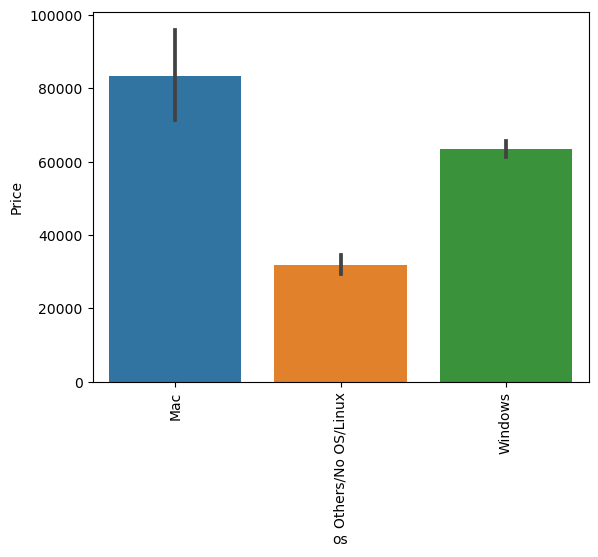

In [121]:
# OS vs price after feature engineering

sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Price of MAC os is more compared to WIN OS**

<Axes: xlabel='Weight', ylabel='Density'>

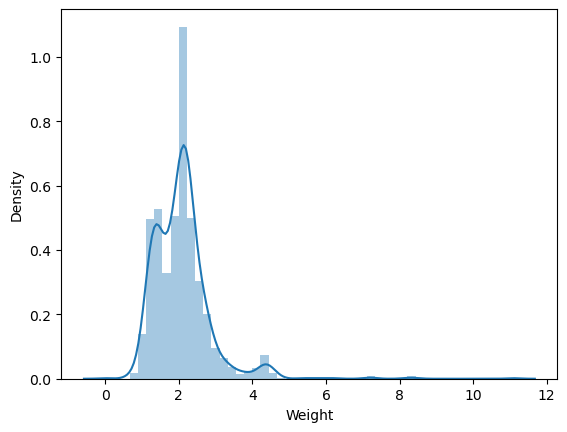

In [122]:
# Distribution of 'weight' column


sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

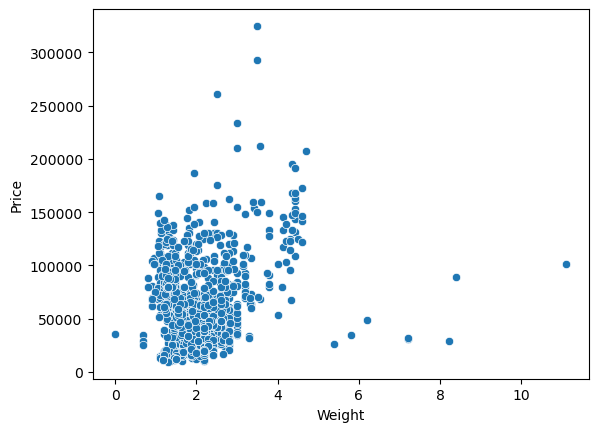

In [123]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [124]:
df.corr(numeric_only=True)['Price']

Ram            0.685521
Weight         0.175038
Price          1.000000
Touchscreen    0.190738
Ips            0.255987
ppi            0.470554
HDD           -0.095286
SSD            0.668271
Name: Price, dtype: float64

<Axes: >

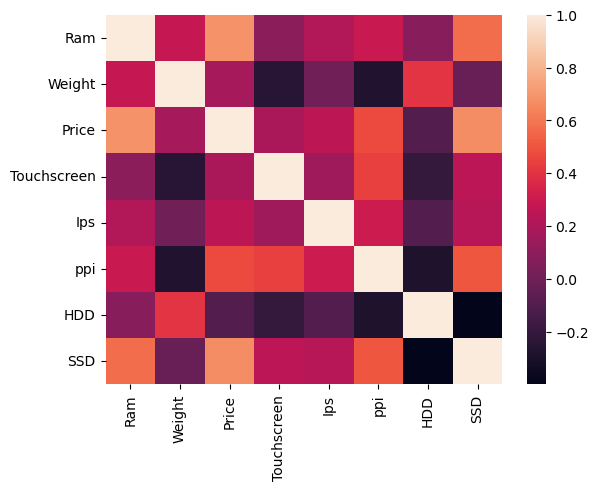

In [125]:
# Heat map to observe the correlation

sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

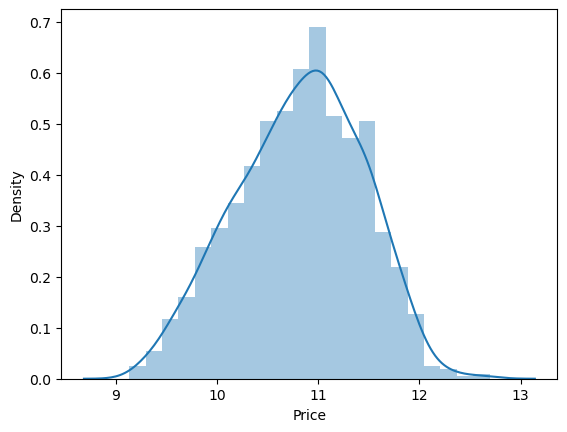

In [126]:
# Standardzation of price column

sns.distplot(np.log(df['Price']))

**Normally distributed**

In [127]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [128]:
# Creating 2 dataframe X and y

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [129]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [130]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [131]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# Model Selection

In [132]:
# importing libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


In [133]:
# importing the metrics fro evaluation

from sklearn.metrics import r2_score,mean_absolute_error

In [134]:
# convert categorical variables into dummy or indicator variables

X = pd.get_dummies(X, columns=['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], drop_first=True)

In [135]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [137]:
# splitting data into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [138]:
X_train

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
1169,8,2.20,0,1,141.211998,1000,0,False,False,False,...,False,False,False,False,True,False,False,True,False,True
288,16,2.50,0,1,141.211998,1000,256,False,False,False,...,False,False,False,False,True,False,False,True,False,True
496,8,2.17,0,0,141.211998,0,256,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1026,4,2.31,0,0,111.935204,500,0,False,False,False,...,False,False,False,True,False,False,True,False,False,True
402,8,2.10,0,1,86.051061,1000,256,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,8,1.70,0,0,157.350512,0,180,False,False,False,...,False,False,False,True,False,False,True,False,False,True
308,8,2.30,0,0,141.211998,1000,128,False,False,False,...,False,False,False,True,False,False,False,True,False,True
505,8,1.44,0,0,165.632118,0,256,False,False,False,...,False,False,False,True,False,False,True,False,False,True
539,8,1.87,0,1,157.350512,0,256,False,False,False,...,False,False,False,False,True,False,False,True,False,True


# Linear Regression

In [139]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7205772505776888
MAE 0.2335665356177286


# Random Forrest

In [140]:
model1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8309750323811689
MAE 0.19001061607376385


# Gradient Boosting

In [141]:
model2 = GradientBoostingRegressor(n_estimators=300)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.83258806505127
MAE 0.1902618387425051


**Gradient Boosting gives the maximum accuracy of 83.28% in comaprison with Linear Regression and Random Forrest**

In [142]:
# # exporting to csv file and save

# X.to_csv(r'E:\Users\JOYDEEP\Desktop\file11.csv')

# Making a prediction system

In [146]:
# Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,
# Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,
# Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,
# Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,
# TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,
# Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,
# Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows


#Samsung 8gb ram, 256 ssd, IPS, Nvidia- 54000
input = (8,2.2,0,1,141.2119981,0,256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1)

# DEll, 16 gb ram , 512 ssd,i5- 98000
# input = (16,1.2,1,0,276.0535301,0,512,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1)


# Dell 4gb ram, 256 ssd- 29000
# input = (4,2.2,0,0,141.2119981,0,256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1)


# changing the input to numpy array

new_input = np.asarray(input)


# reshaping the array as we are predicting for one instance

reshaped_input = new_input.reshape(1,-1)


prediction = model2.predict(reshaped_input)

print(np.exp(prediction))

[54351.36061125]
